<a href="https://colab.research.google.com/github/Ramiassaf/Studio_Image_Classification/blob/main/Studio_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# Importing Libraries and Modules for Image Classification with Deep Learning

In [ ]:
# Import the NumPy library for numerical computations and array operations.
import numpy as np

# Import the pandas library for data manipulation and analysis.
import pandas as pd

# Import the os module for interacting with the operating system.
import os

# Import the listdir function from the os module to retrieve a list of files in a directory.
from os import listdir

# Import the TensorFlow library for building and training deep learning models.
import tensorflow as tf

# Import the ImageDataGenerator class from the Keras library for image data augmentation.
from keras.preprocessing.image import ImageDataGenerator

# Import the OpenCV library for image processing tasks.
import cv2

# Import the pyplot module from the matplotlib library for data visualization.
import matplotlib.pyplot as plt

# Set the backend of matplotlib to display plots inline in the Jupyter Notebook.
%matplotlib inline

# Import the imutils library for image resizing and manipulation.
import imutils

# Import the shutil library for file management tasks.
import shutil

# Import the models and layers modules from the TensorFlow Keras API for model construction.
from tensorflow.keras import models, layers

# Import the Model class and the load_model function from TensorFlow Keras for model definition and loading pre-trained models.
from tensorflow.keras.models import Model, load_model

# Import various layer types from TensorFlow Keras for building the model architecture.
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Flatten, Activation, Dense, MaxPooling2D

# Import the train_test_split function from scikit-learn for splitting the dataset into training and validation sets.
from sklearn.model_selection import train_test_split

# Import the shuffle function from scikit-learn for shuffling the dataset.
from sklearn.utils import shuffle

# Import the warnings module for handling warning messages.
import warnings

# Import the to_categorical function from Keras for one-hot encoding categorical labels.
from keras.utils import to_categorical

# Import the EarlyStopping and ReduceLROnPlateau callback functions from Keras for model training control.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Ignore warning messages.
warnings.filterwarnings('ignore')


# Loading The Data Set

In [ ]:
import os
IMG_PATH="/content/drive/MyDrive/DATA/DATA SET"  #path to the directory containing the dataset
os.chdir(IMG_PATH)

# Displaying Random Images from the Dataset with Labels

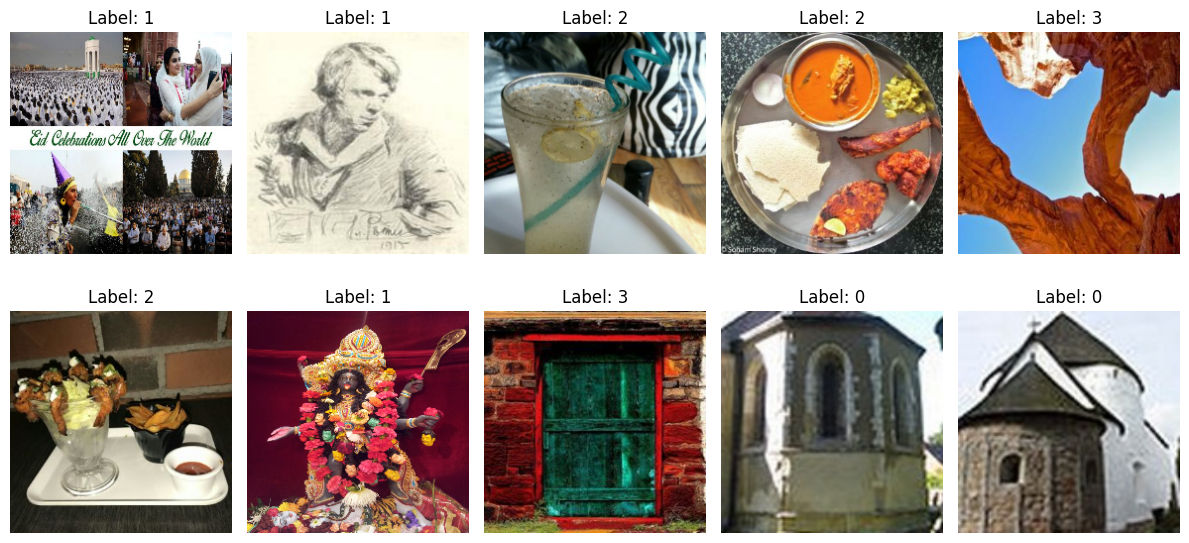

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

categories = ["architecture", "art and culture", "food and drinks", "travel and  adventure"]
labels = [0, 1, 2, 3]
img_width = 224
img_height = 224

# Load the images and assign labels
images = []
labels_list = []

for category, label in zip(categories, labels):
    category_path = os.path.join(IMG_PATH, category)

    if not os.path.exists(category_path):
        print(f"Directory not found: {category_path}")
        continue

    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image = cv2.imread(image_path)

        if image is None:
            continue

        image = cv2.resize(image, (img_width, img_height))
        images.append(image)
        labels_list.append(label)


# Choose 10 random indices
if len(images) < 10:
    print("Not enough images to select random samples.")
else:
    random_indices = random.sample(range(len(images)), 10)

    # Display the images
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.ravel()

    for i, idx in enumerate(random_indices):
        image = images[idx]
        label = labels_list[idx]
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
        axes[i].set_title("Label: {}".format(label))
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()
# Convert the images to numpy arrays
images = np.array(images)
labels_list = np.array(labels_list)

# Image Augmentation Visualization Sample


> Data augmentation is a technique commonly used in machine learning and deep learning to artificially increase the size of a training dataset by applying various transformations to the existing data samples. The goal of data augmentation is to create new variations of the original data without changing the underlying label or target value.


> In the context of image data, data augmentation involves applying a series of transformations to images, such as rotations, translations, flips, zooms, shears, and changes in brightness or contrast. These transformations mimic real-world variations that may occur in the input data, making the model more robust to changes in the test data.





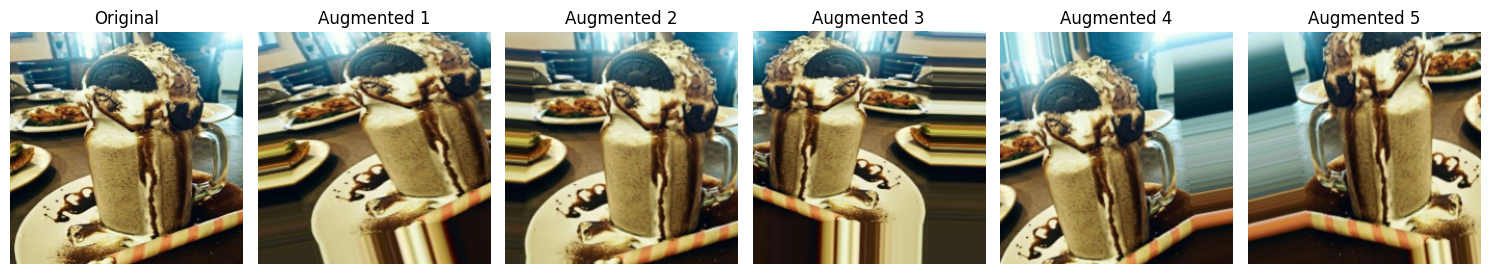

In [ ]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Choose a random image from the dataset
random_index = random.randint(0, len(images) - 1)
image = images[random_index]

# Preprocess the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB format
image = cv2.resize(image, (img_width, img_height))  # Resize the image to the desired width and height

# Create an ImageDataGenerator with desired augmentation settings
datagen = ImageDataGenerator(
    rescale=1./255,             # Scale the pixel values to a range between 0 and 1
    rotation_range=20,          # Randomly rotate the image within the range [-20, 20] degrees
    width_shift_range=0.2,      # Randomly shift the width of the image by a fraction of 0.2
    height_shift_range=0.2,     # Randomly shift the height of the image by a fraction of 0.2
    shear_range=0.2,            # Randomly apply shear transformation within the range [-0.2, 0.2]
    zoom_range=0.2,             # Randomly zoom the image within the range [0.8, 1.2]
    horizontal_flip=True       # Randomly flip the image horizontally
)

# Reshape the image to match the expected input shape of the generator
image = image.reshape((1,) + image.shape)

# Generate augmented images from the original image
augmented_images = []
for batch in datagen.flow(image, batch_size=1):  # Iterate over the augmented batches generated by datagen
    augmented_images.append(batch)              # Append each augmented batch to the list
    if len(augmented_images) >= 5:              # Generate 5 augmented images for visualization
        break

# Display the original image and its augmented versions
fig, axes = plt.subplots(1, 6, figsize=(15, 5))  # Create a 1x6 grid of subplots
axes[0].imshow(image[0])                       # Display the original image in the first subplot
axes[0].set_title("Original")                  # Set the title of the first subplot
axes[0].axis("off")                            # Turn off axis labels for the first subplot

for i, augmented_image in enumerate(augmented_images):
    axes[i+1].imshow(augmented_image[0])        # Display each augmented image in the subsequent subplots
    axes[i+1].set_title(f"Augmented {i+1}")    # Set the title for each augmented image subplot
    axes[i+1].axis("off")                       # Turn off axis labels for each augmented image subplot

plt.tight_layout()                             # Adjust subplot parameters for a better layout
plt.show()                                     # Display the plot with the original and augmented images


# Augmentation of all the data set

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np

categories = ["architecture", "art and culture", "food and drinks", "travel and  adventure"]
labels = [0, 1, 2, 3]
img_width = 224
img_height = 224
batch_size = 16  # Number of images to process in each batch

images_list = []
labels_list = []

for category, label in zip(categories, labels):
    category_path = os.path.join(IMG_PATH, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image = cv2.imread(image_path)

        # Check if the image size is empty
        if image is not None and image.size > 0:
            image = cv2.GaussianBlur(image, (5, 5), 0)
            image = cv2.resize(image, (img_width, img_height))
            images_list.append(image)
            labels_list.append(label)
        else:
            print("Empty image:", image_path)
            # Delete the empty image file
            os.remove(image_path)

images_list = np.array(images_list)
labels = np.array(labels_list)

# Preprocess and augment the images in batches
datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

augmented_images = []
augmented_labels = []

# Create the directory to save augmented images
augmented_dir = 'augmented_images'
os.makedirs(augmented_dir, exist_ok=True)

num_batches = int(np.ceil(len(images_list) / batch_size))

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size

    batch_images = images_list[start_idx:end_idx]
    batch_labels = labels[start_idx:end_idx]

    augmented_batch = datagen.flow(batch_images, batch_size=batch_size, save_to_dir=augmented_dir, save_prefix='aug_', save_format='jpg')

    for _ in range(int(np.ceil(len(batch_images) / batch_size))):
        next(augmented_batch)

print("Data augmentation complete.")


Data augmentation complete.


#Splitting The Data into Training and Validation Sets


> The code provided below is used to split the data into three sets: training, validation, and testing. The train_test_split() function from the sklearn.model_selection module is used to do this. The test_size parameter controls the percentage of data that is used for the test set. In this case, 30% of the data is used for the test set, and the remaining 70% is used for the training and validation sets.

> The reason why I use a validation set is to evaluate the performance of the model during training. The validation set is not used to train the model, so it provides an unbiased estimate of the model's performance. This helps to ensure that the model is not overfitting to the training data




In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images_list, labels, test_size=0.3, random_state=42)

# Further Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)




# Print the shapes of the resulting sets
print("Train data shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
#print("Test data shape:", X_test.shape)
#print("Test labels shape:", y_test.shape

Train data shape: (834, 224, 224, 3)
Train labels shape: (834,)
Validation data shape: (358, 224, 224, 3)
Validation labels shape: (358,)


In [ ]:
class_names = categories  #  actual list of category names
print(class_names)

['architecture', 'art and culture', 'food and drinks', 'travel and  adventure']


# CNN Model


> Convolutional Neural Network (CNN) is a type of artificial neural network that is commonly used for image recognition and processing.CNNs work by applying a series of convolution operations to the input image. A convolution operation is a mathematical operation that takes a small window of pixels from the input image and calculates the correlation between the window and a set of learnable weights. The output of the convolution operation is a feature map, which represents the presence or absence of certain features in the input image.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

def create_better_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



# Normalization Of Train And Validation Data


> Normalization is an essential preprocessing step before feeding a dataset into a deep learning Convolutional Neural Network (CNN) model. Normalization brings the input data to a consistent scale and range, which helps improve the convergence speed and stability of the learning process.There are several reasons why normalization is beneficial for training CNNs:


1.   Convergence
2.   Stability
3.   Better Generalization
4.   Avoiding Vanishing/Exploding Gradients
5.   Handling Different Data Ranges












In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the train_data to 2D array
train_data_2d = X_train.reshape(X_train.shape[0], -1)
val_data_2d = X_val.reshape(X_val.shape[0], -1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the train_data
scaler.fit(train_data_2d)
scaler.fit(val_data_2d)
# Normalize the train_data
train_data_normalized = scaler.transform(train_data_2d)
val_data_normalized = scaler.transform(val_data_2d)

# Reshape the train_data_normalized back to its original shape
X_train = train_data_normalized.reshape(X_train.shape)
X_val = val_data_normalized.reshape(X_val.shape)


# Model Training with Early Stopping and Learning Rate Reduction


> **Early stopping rate** is a hyperparameter that determines when to stop training a machine learning model. It is typically defined as the number of epochs or iterations that the model should train for before it is stopped. The early stopping rate is used to prevent overfitting, which is a problem that occurs when a model learns the training data too well and is unable to generalize to new data. The early stopping rate is typically set based on the validation loss. The validation loss is the loss that the model achieves on a dataset that it has not seen before. If the validation loss starts to increase after a certain number of epochs, then the model is likely starting to overfit. The early stopping rate is then set to the number of epochs before the validation loss started to increase.


> **Learning rate reduction** is a technique used in machine learning to improve the performance of a model. It involves reducing the learning rate of the model after a certain number of epochs. This helps to prevent the model from overfitting the training data and improves its generalization performance.
The learning rate is a hyperparameter that controls how much the model's weights are updated during training. A high learning rate can cause the model to converge too quickly, which can lead to overfitting. A low learning rate can cause the model to converge too slowly, which can lead to underfitting.




In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='max', patience=6)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.1, min_lr=1e-6,  verbose=1  )
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)
##
model = create_better_model()
history = model.fit(X_train, y_train_categorical, epochs=30,
                    validation_data=(X_val, y_val_categorical),
                    callbacks=[learning_rate_reduction])

Epoch 1/30
27/27 [==============================] - 17s 110ms/step - loss: 1.6672 - accuracy: 0.3261 - val_loss: 2.5300 - val_accuracy: 0.3547 - lr: 0.0010
Epoch 2/30
27/27 [==============================] - 2s 63ms/step - loss: 1.3748 - accuracy: 0.4101 - val_loss: 2.2389 - val_accuracy: 0.3855 - lr: 0.0010
Epoch 3/30
27/27 [==============================] - 2s 68ms/step - loss: 1.2247 - accuracy: 0.4832 - val_loss: 1.3333 - val_accuracy: 0.4860 - lr: 0.0010
Epoch 4/30
27/27 [==============================] - 2s 67ms/step - loss: 1.1455 - accuracy: 0.5000 - val_loss: 0.9785 - val_accuracy: 0.5670 - lr: 0.0010
Epoch 5/30
27/27 [==============================] - 2s 61ms/step - loss: 1.0683 - accuracy: 0.5252 - val_loss: 1.3244 - val_accuracy: 0.4777 - lr: 0.0010
Epoch 6/30
26/27 [===========================>..] - ETA: 0s - loss: 1.0856 - accuracy: 0.5108
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
27/27 [==============================] - 2s 60ms/step - l

# Saving the Model


In [ ]:
model.save('Model11__.h5')

# Model Summary


> IModel Summary is a concise representation of a neural network model's architecture, providing a summary of its layers, output shapes, and the number of trainable parameters. The model summary is a helpful tool for quickly understanding the structure of a complex neural network and checking if everything is set up as intended.


1.  **Layer (Type):** The type of layer, such as Conv2D, Dense, MaxPooling2D, etc.
2.   **Output Shape:** The shape of the output tensor produced by the layer. It shows the dimensions of the output after the layer's computations.
3.**Param # (Trainable Parameters):** The number of trainable parameters in the layer. These are the weights and biases that the model will learn during training.





In [ ]:
from tensorflow import keras

# Load the saved model
model = keras.models.load_model('Model__.h5')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 54, 54, 64)        0         
                                                                 
 batch_normalization_2 (Batc  (None, 54, 54, 64)      

# Model Evaluation

In [ ]:
results = model.evaluate(X_val,y_val_categorical, verbose=2)

print("    val Loss: {:.5f}".format(results[0]))
print("val Accuracy: {:.2f}%".format(results[1] * 100))

12/12 - 0s - loss: 0.8225 - accuracy: 0.7654 - 398ms/epoch - 33ms/step
    val Loss: 0.82249
val Accuracy: 76.54%


In [ ]:
pred = model.predict(X_val)
pred = np.argmax(pred,axis=1)

y_test_new = np.argmax(y_val_categorical,axis=1)

12/12 [==============================] - 0s 17ms/step


# Classification Report


> classification report is a table that summarizes the performance of a classification model on a per-class basis. It provides four key metrics:

  1. **Precision:** The percentage of predicted positive instances that are actually positive.
  2.**Recal:**  The percentage of actual positive instances that are predicted positive.
  3. **F1 score:**The harmonic mean of precision and recal
  4. **Support:** The number of instances in the test set for the given class.





In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        94
           1       0.92      0.81      0.86        97
           2       0.77      0.76      0.77        88
           3       0.56      0.59      0.58        79

    accuracy                           0.77       358
   macro avg       0.76      0.76      0.76       358
weighted avg       0.77      0.77      0.77       358



12/12 [==============================] - 0s 19ms/step


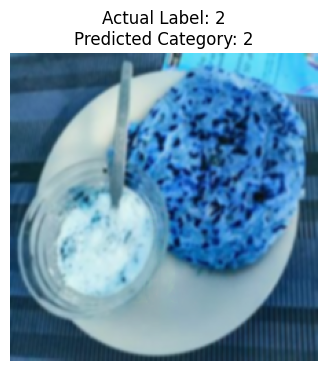

---


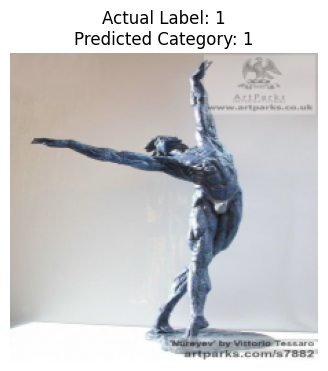

---


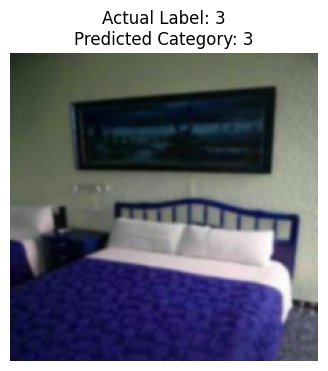

---


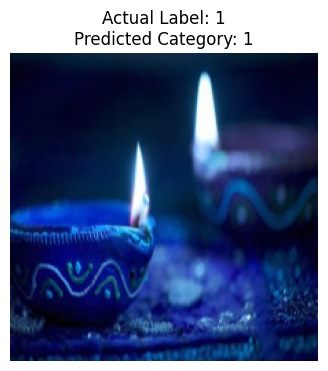

---


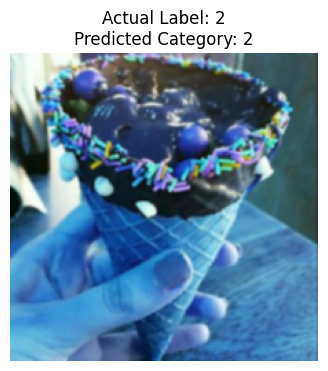

---


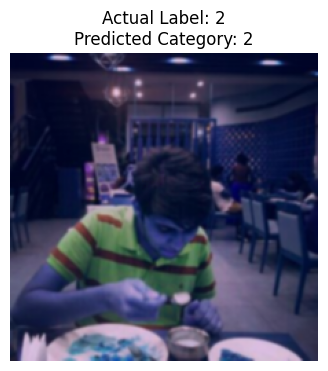

---


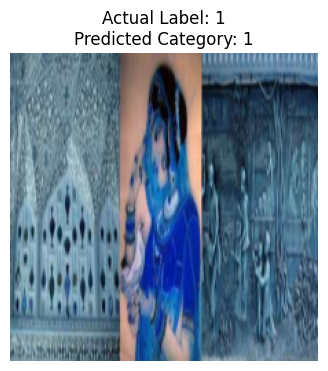

---


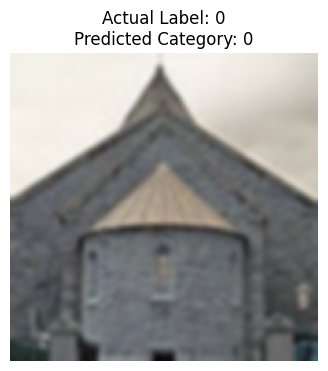

---


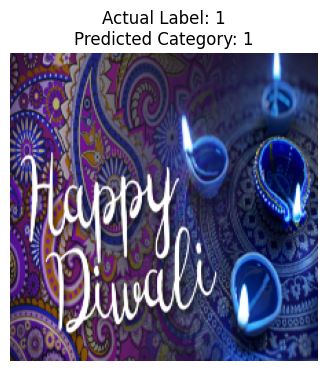

---


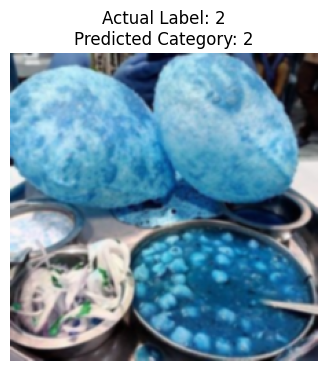

---


In [ ]:
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the saved model
# model = keras.models.load_model('your_model_path.h5')

# Make predictions on new data
predictions = model.predict(X_val)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

label_encoder = LabelEncoder()
label_encoder.fit(y_val)
predicted_categories = label_encoder.inverse_transform(predicted_labels)

# Select 10 random indices to display images
random_indices = np.random.choice(len(X_val), size=10, replace=False)

# Print images along with predicted and actual labels
for idx in random_indices:
    original_label = y_val[idx]
    predicted_category = predicted_categories[idx]

    plt.figure(figsize=(4, 4))
    plt.imshow(X_val[idx])
    plt.title(f"Actual Label: {original_label}\nPredicted Category: {predicted_category}")
    plt.axis('off')
    plt.show()

    print("---")
